In [1]:


import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import cv2

In [3]:
name="MynameisRahul"

In [4]:
print("The Original String is:- "+name)

The Original String is:- MynameisRahul


In [5]:
res=''.join(format(ord(i),'b')for i in name)

In [6]:
print(res)

1001101111100111011101100001110110111001011101001111001110100101100001110100011101011101100


In [7]:
def BinaryTointeger(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal)     

bin_data =res
   
print("The binary value is:", bin_data) 
   

str_data =' '
   

for i in range(0, len(bin_data), 7): 
    temp_data = int(bin_data[i:i + 7]) 
    decimal_data = BinaryTointeger(temp_data) 
    str_data = str_data + chr(decimal_data)  
print("The Binary value after string conversion is:",str_data) 

The binary value is: 1001101111100111011101100001110110111001011101001111001110100101100001110100011101011101100
The Binary value after string conversion is:  MynameisRahul


In [8]:
def message2binary(message):
    if type(message) == str:
        result= ''.join([ format(ord(i), "08b") for i in message ])
    
    elif type(message) == bytes or type(message) == np.ndarray:
        result= [ format(i, "08b") for i in message ]
    
    elif type(message) == int or type(message) == np.uint8:
        result=format(message, "08b")

    else:
        raise TypeError("Input type is not supported")
    
    return result  

In [9]:
from IPython.display import Image
import os


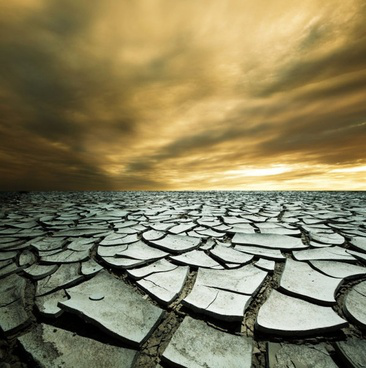

In [10]:
Image('helo.png')

In [11]:
image=cv2.imread("helo.png")

In [22]:
h='1000110'
int(h[:-1]+'1',2)


71

In [23]:
list1=[ ]

In [24]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")    
    if (len(data) == 0): 
        raise ValueError('Data is empty')
  
    filename = input("Enter the name of the New Image after Encoding(with extension):")
    
    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8
    
    print("Maximum bytes to encode:", no_bytes)
    
    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
    
    # Using the below as delimeter
    data +='*****'    
    
    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)
    
    print("The Length of Binary data",data_len)
    
    data_index = 0
    
    for i in img:
        for pixel in i:
            
            r, g, b = message2binary(pixel)
            if data_index < data_len:
                pixel[0] = int(r[:-1] + data_binary[data_index], 2) 
              
                data_index += 1
                list1.append(pixel[0])

            if data_index < data_len:
             # hiding the data into LSB of Green Pixel
                pixel[1] = int(g[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Green Pixel
                data_index += 1
                list1.append(pixel[1])

            if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
                pixel[2] = int(b[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Blue pixel
                data_index += 1
                list1.append(pixel[2])

              # if data is encoded, just breaking out of the Loop
            if data_index >= data_len:
                break

         
  
    cv2.imwrite(filename,img)
    
    print("Encoded the data successfully and the image is successfully saved as ",filename)
        

In [ ]:
encode_data(image)

Enter the data to be Encoded:Hello! This is my Project


In [16]:
def decode_data(img):
    
    binary_data = ""
    for i in img:
        for pixel in i:
            r, g, b = message2binary(pixel) 
            binary_data += r[-1]  
            binary_data += g[-1]  
            binary_data += b[-1]  
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "*****": 
            break
    print("The Encoded data was :--",decoded_data[:-5])

In [17]:
image1=cv2.imread("sowm_final.png")

In [18]:
decode_data(image1)

TypeError: 'NoneType' object is not iterable

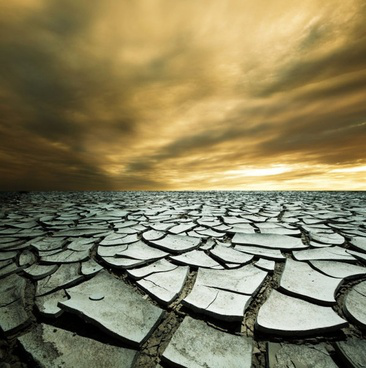

In [19]:
Image('helo.png')

In [20]:
Image('sowm_final.png')

FileNotFoundError: No such file or directory: 'sowm_final.png'

FileNotFoundError: No such file or directory: 'sowm_final.png'

<IPython.core.display.Image object>

In [21]:
decode_data(image1)

TypeError: 'NoneType' object is not iterable